In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargo el dataset indicando que datetime es una fecha
df = pd.read_csv('../data/raw/precios_energia_comparativo.csv', parse_dates=['datetime'])

# la fecha como indice para facilitar los graficos temporales
df.set_index('datetime', inplace=True)
display(df.head())

,España,Francia,Portugal
datetime,,,
2014-01-01 23:00:00,25.280833,28.71125,25.043750
2014-01-02 23:00:00,39.924167,28.39750,38.980417
2014-01-03 23:00:00,4.992083,12.99750,4.683750
2014-01-04 23:00:00,4.091667,23.08500,4.091667
2014-01-05 23:00:00,13.587500,31.29000,12.762500


Panorama general de la evolucion del precio de la energia, España y Portugal estan casi encimadas ya que llevan una correlacion casi perfecta de 0.99 , es decir si sube la energia en Madrid tambien lo hace en Lisboa 

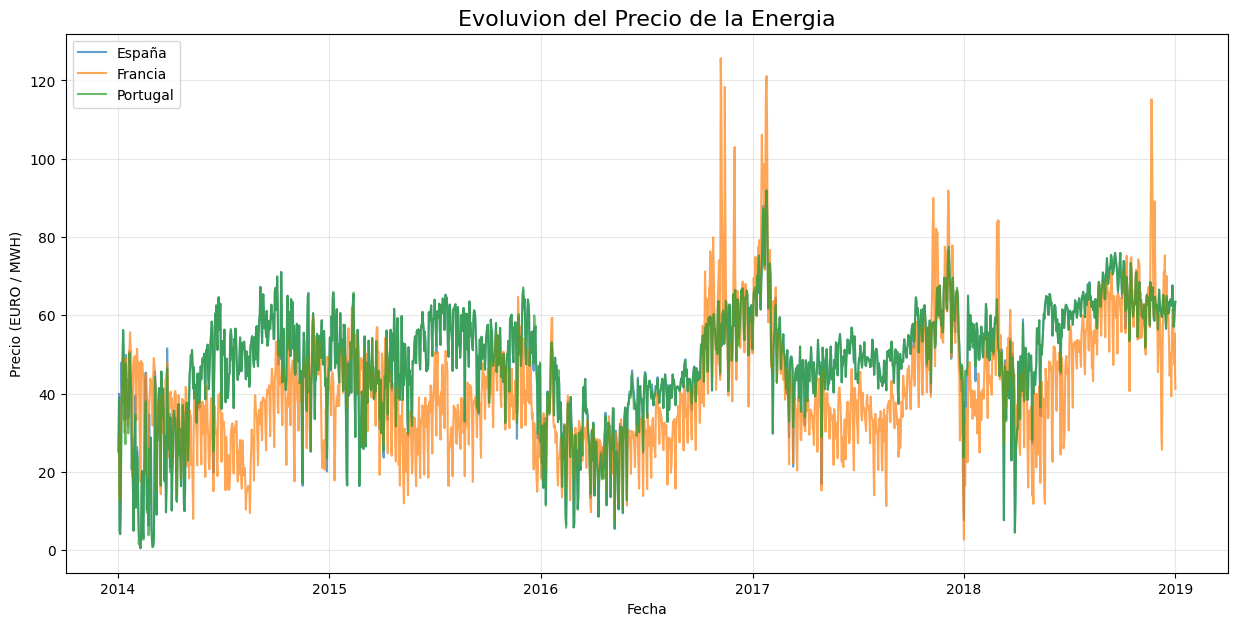

In [10]:
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['España'], label='España', alpha= 0.7)
plt.plot(df.index, df['Francia'], label='Francia', alpha= 0.7)
plt.plot(df.index, df['Portugal'], label='Portugal', alpha= 0.7)

plt.title('Evoluvion del Precio de la Energia', fontsize= 16)
plt.xlabel('Fecha')
plt.ylabel('Precio (EURO / MWH)')
plt.legend()
plt.grid(True, alpha= 0.3)
plt.show()

Box Plot de Estabilidad , caja mas pequeña indica un pais con precios mas predecibles mientras mayores outliers indican un pais propenso a crisis de los precios o picos repentinos 

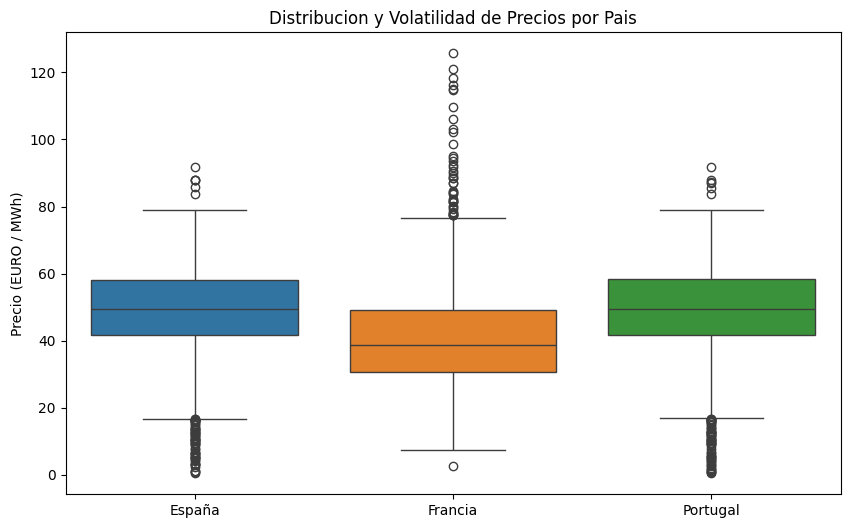

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Distribucion y Volatilidad de Precios por Pais')
plt.ylabel('Precio (EURO / MWh)')
plt.show()